Importing Libraries

In [223]:
import pandas as pd
import numpy as np

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading Dataset


In [228]:
df = sns.load_dataset("titanic")

In [230]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [236]:
df.shape

(891, 15)

In [238]:
df.drop(["embarked","class","alive"], axis = 1 , inplace = True)

In [240]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


Exploratory Data Analysis (EDA)


In [243]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    

In [245]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [247]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing values"])

,Total Missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


In [217]:
sns.set_style("darkgrid")
sns.countplot (x = "deck" , data = df, palette = "viridis")

ValueError: Could not interpret value `deck` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='deck', ylabel='count'>

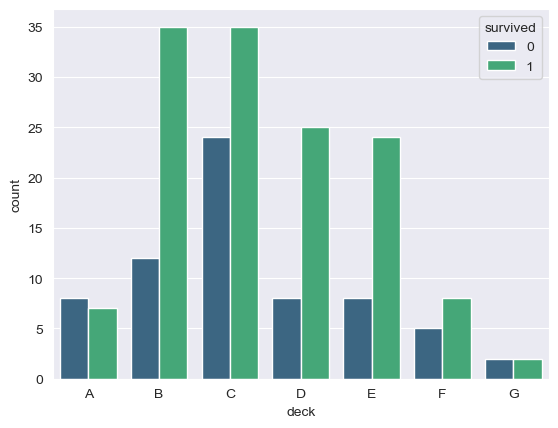

In [56]:
sns.set_style("darkgrid")
sns.countplot (x = "deck" , hue = "survived", data = df, palette = "viridis")

In [58]:
df.drop(["deck"],axis = 1 , inplace = True)

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

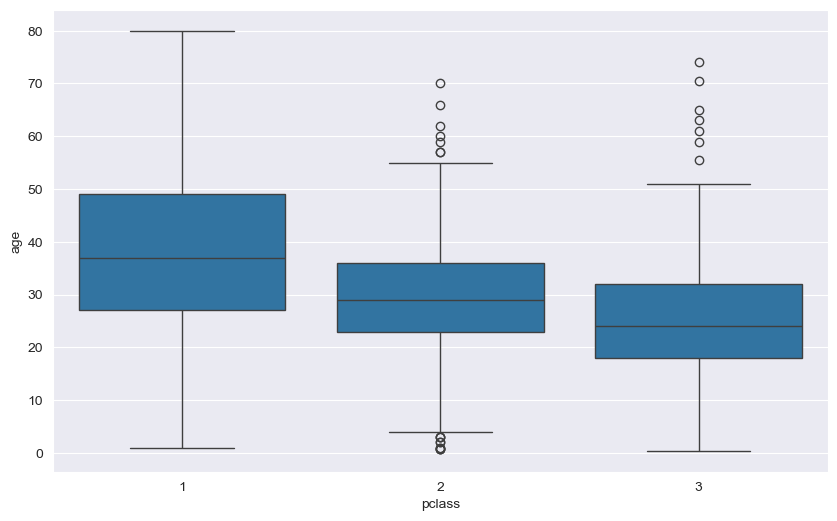

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "pclass" , y = "age" , data = df)

In [68]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [70]:
df.age = df [["age","pclass"]].apply(fillna_age, axis =1)

In [72]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing values"])
    

,Total Missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [74]:
df.dropna(inplace = True)

In [76]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing values"])
    

,Total Missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

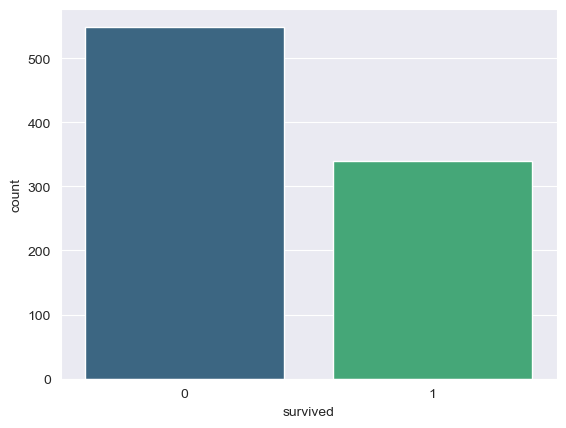

In [80]:
sns.set_style("darkgrid")
sns.countplot(x="survived", data = df , palette = "viridis")

In [249]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

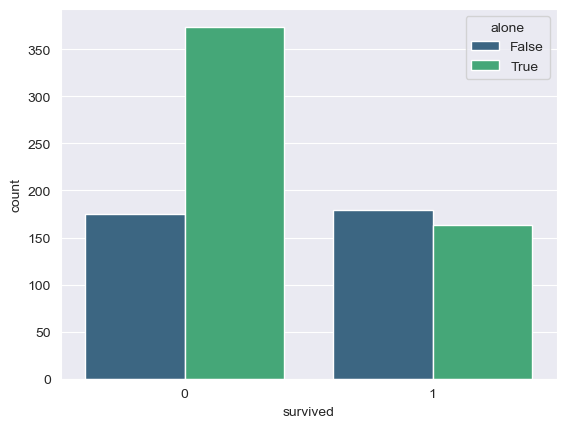

In [251]:
sns.set_style("darkgrid")
sns.countplot(x="survived", hue = "alone", data = df , palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

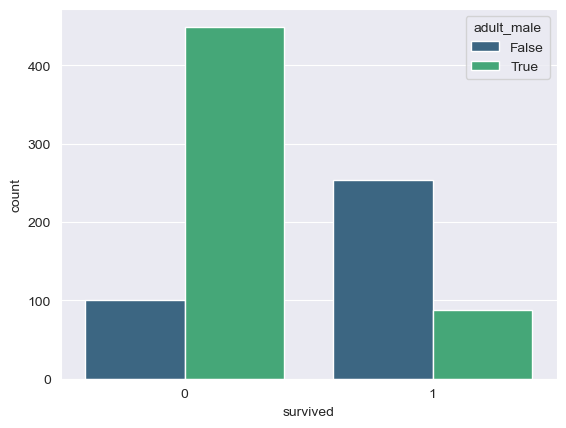

In [253]:
sns.set_style("darkgrid")
sns.countplot(x="survived", hue ="adult_male",data = df , palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

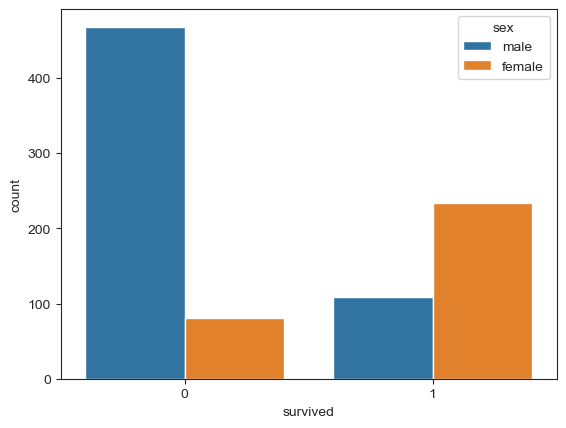

In [255]:
sns.set_style("ticks")
sns.countplot(x="survived", hue ="sex",data = df )

<Axes: xlabel='survived', ylabel='count'>

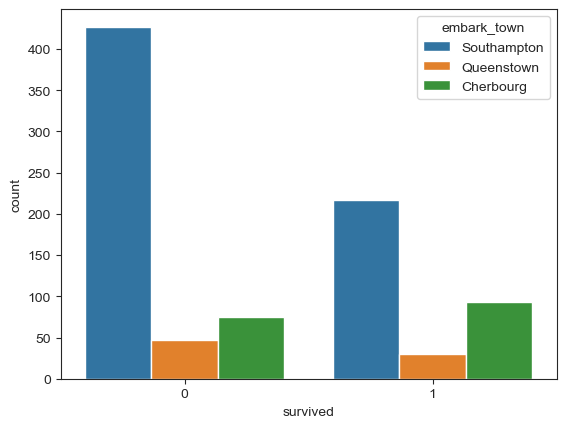

In [257]:
sns.set_style("ticks")
sns.countplot(x="survived", hue ="embark_town",data = df )

In [259]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

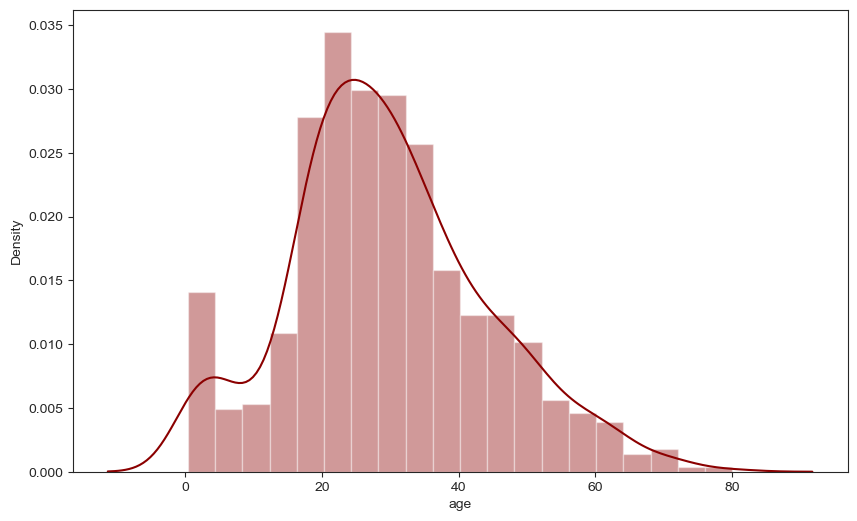

In [261]:
plt.figure(figsize = (10,6))
sns.distplot (df["age"],color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

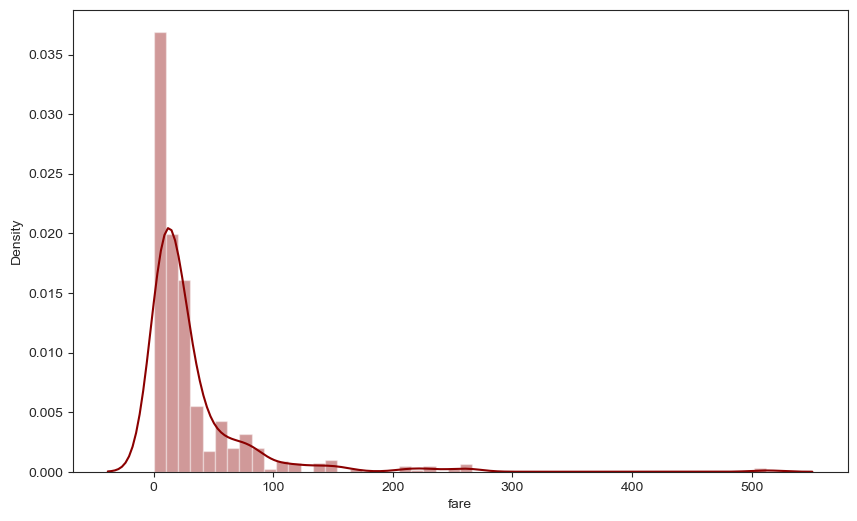

In [263]:
plt.figure(figsize = (10,6))
sns.distplot (df["fare"],color = "darkred")

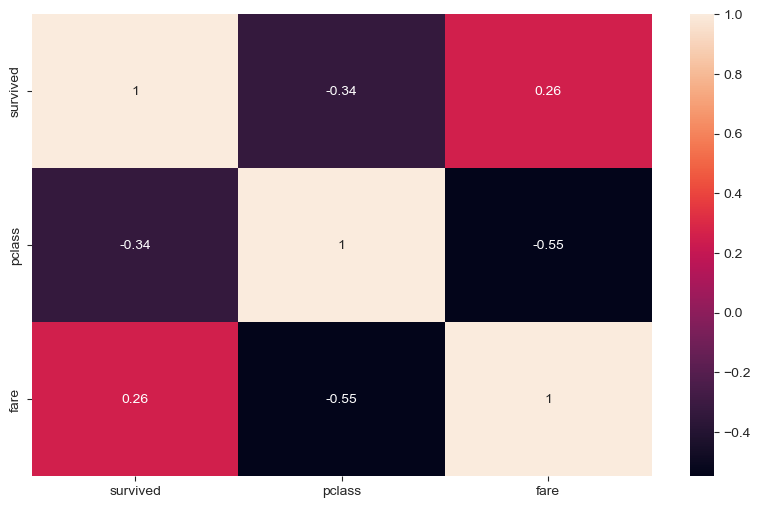

In [269]:

plt.figure(figsize = (10, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [271]:
df.drop(["age", "sibsp", "parch"], axis =1 , inplace = True)

KeyError: "['age', 'sibsp', 'parch'] not found in axis"

In [ ]:
df.head()

In [ ]:
# get_dummies = categorical to numwerical variable

sex = pd.get_dummies(df["sex"],drop_first = True)
who = pd.get_dummies(df["who"],drop_first = True)
adult_male = pd.get_dummies(df["adult_male"],drop_first = True)
embark_town = pd.get_dummies(df["embark_town"],drop_first = True)
alone = pd.get_dummies(df["alone"],drop_first = True)

In [279]:
#concate function
df= pd.concat([df, sex , who ,adult_male,embark_town, alone], axis =1)

In [281]:
df.head()

,survived,pclass,sex,fare,who,adult_male,deck,embark_town,alone,1,...,Queenstown,Southampton,True,1,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,NaN,Southampton,False,False,...,False,True,False,False,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,C,Cherbourg,False,True,...,False,False,False,True,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,NaN,Southampton,True,True,...,False,True,True,True,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,C,Southampton,False,True,...,False,True,False,True,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,NaN,Southampton,True,False,...,False,True,True,False,True,False,True,False,True,True


In [283]:
df.drop(["sex" , "who" ,"adult_male", "embark_town", "alone"], axis =1 , inplace = True)

In [285]:
df.head()

,survived,pclass,fare,deck,1,man,woman,True,Queenstown,Southampton,True,1,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,NaN,False,True,False,True,False,True,False,False,True,False,True,False,True,False
1,1,1,71.2833,C,True,False,True,False,False,False,False,True,False,True,False,False,False,False
2,1,3,7.9250,NaN,True,False,True,False,False,True,True,True,False,True,False,False,True,True
3,1,1,53.1000,C,True,False,True,False,False,True,False,True,False,True,False,False,True,False
4,0,3,8.0500,NaN,False,True,False,True,False,True,True,False,True,False,True,False,True,True


_Modelling_

In [288]:
from sklearn.model_selection import train_test_split


In [312]:
x= df.drop("survived",axis =1)
y = df["survived"]

In [314]:
x_train, x_test, y_train , y_test = train_test_split(X,y, test_size = 0.25,random_state = 42 )

In [316]:
from sklearn.linear_model import LogisticRegression

In [318]:
lr_model = LogisticRegression()

In [302]:
# print(X_train.columns)
# print(X_train.columns.map(type))


Index([     'pclass',        'fare',        'deck',             1,
               'man',       'woman',          True,  'Queenstown',
       'Southampton',          True,             1,         'man',
             'woman',          True,  'Queenstown', 'Southampton',
                True],
      dtype='object')
Index([ <class 'str'>,  <class 'str'>,  <class 'str'>,  <class 'int'>,
        <class 'str'>,  <class 'str'>, <class 'bool'>,  <class 'str'>,
        <class 'str'>, <class 'bool'>,  <class 'int'>,  <class 'str'>,
        <class 'str'>, <class 'bool'>,  <class 'str'>,  <class 'str'>,
       <class 'bool'>],
      dtype='object')


In [304]:
# X_train.columns = X_train.columns.astype(str)
# X_test.columns = X_test.columns.astype(str)


In [308]:
# print(y_train.isnull().sum())


0


In [320]:
lr_model.fit(x_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.